In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import glob

In [18]:
files = [f for f in glob.glob("../data/raw/train/*.csv")]

In [49]:
for file in files:
    ddf = dd.read_csv(file, dtype=str)
    print()
    print('---------------')
    print(file.split('\\')[-1])
    print()
    print(len(ddf))
    print(ddf.columns.to_list())


---------------
allergies.csv

29412
['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION']

---------------
careplans.csv

489745
['Id', 'START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION', 'REASONCODE', 'REASONDESCRIPTION']

---------------
conditions.csv

1362601
['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION']

---------------
devices.csv

33496
['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION', 'UDI']

---------------
encounters.csv

6023703
['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER', 'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION']

---------------
imaging_studies.csv

57345
['Id', 'DATE', 'PATIENT', 'ENCOUNTER', 'BODYSITE_CODE', 'BODYSITE_DESCRIPTION', 'MODALITY_CODE', 'MODALITY_DESCRIPTION', 'SOP_CODE', 'SOP_DESCRIPTION']

---------------
immunizations.csv

131924
['DATE', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIP

In [61]:
ddf_alergies = dd.read_csv('../data/raw/train/allergies.csv')
ddf_conditions = dd.read_csv('../data/raw/train/conditions.csv')
ddf_patients = dd.read_csv('../data/raw/train/patients.csv')
ddf_observations = dd.read_csv('../data/raw/train/observations.csv')

In [35]:
ddf_patients_conditions = dd.merge(ddf_patients, ddf_conditions, left_on='Id', right_on='PATIENT')

In [37]:
ddf_patients_conditions.compute()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,93fa6213-73a1-4cce-b408-9986a4145801,1989-09-05,2001-12-04,999-87-8276,NaN,NaN,NaN,Roland928,Wolff180,NaN,...,42.398277,-71.289383,6520.55,0.00,1995-08-22,NaN,93fa6213-73a1-4cce-b408-9986a4145801,4487de56-f20a-422d-a2f6-aa15dcd1cd6d,53741008,Coronary Heart Disease
1,93fa6213-73a1-4cce-b408-9986a4145801,1989-09-05,2001-12-04,999-87-8276,NaN,NaN,NaN,Roland928,Wolff180,NaN,...,42.398277,-71.289383,6520.55,0.00,2000-12-20,2000-12-27,93fa6213-73a1-4cce-b408-9986a4145801,d0105ca5-d725-44e9-aaee-51f0e04392e4,195662009,Acute viral pharyngitis (disorder)
2,93fa6213-73a1-4cce-b408-9986a4145801,1989-09-05,2001-12-04,999-87-8276,NaN,NaN,NaN,Roland928,Wolff180,NaN,...,42.398277,-71.289383,6520.55,0.00,2001-12-04,NaN,93fa6213-73a1-4cce-b408-9986a4145801,1123f059-daf8-4a9e-be5f-e1eee5fcdb48,22298006,Myocardial Infarction
3,93fa6213-73a1-4cce-b408-9986a4145801,1989-09-05,2001-12-04,999-87-8276,NaN,NaN,NaN,Roland928,Wolff180,NaN,...,42.398277,-71.289383,6520.55,0.00,2001-12-04,NaN,93fa6213-73a1-4cce-b408-9986a4145801,1123f059-daf8-4a9e-be5f-e1eee5fcdb48,399211009,History of myocardial infarction (situation)
4,53bbfa41-5cab-422e-a8a7-8fa3ae55ed71,1997-09-25,NaN,999-96-1808,S99962046,X54333499X,Mr.,Jorge203,Chavarría957,NaN,...,42.691016,-71.275475,545777.93,3282.24,2016-11-09,NaN,53bbfa41-5cab-422e-a8a7-8fa3ae55ed71,fdedb884-d844-420a-9ec7-5d6cab4ffd02,370143000,Major depression disorder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323184,89e8d8a3-f80d-4f4e-8458-94e5bc32a802,1941-06-20,2017-01-09,999-48-8722,S99997894,X2570275X,Mr.,Eddie505,Moore224,NaN,...,42.359457,-71.181511,2009755.64,468983.65,2003-03-18,NaN,89e8d8a3-f80d-4f4e-8458-94e5bc32a802,1ddc725c-6950-4af5-90a4-74e6f78caa96,40055000,Chronic sinusitis (disorder)
323185,89e8d8a3-f80d-4f4e-8458-94e5bc32a802,1941-06-20,2017-01-09,999-48-8722,S99997894,X2570275X,Mr.,Eddie505,Moore224,NaN,...,42.359457,-71.181511,2009755.64,468983.65,2006-11-11,NaN,89e8d8a3-f80d-4f4e-8458-94e5bc32a802,63b8d662-ef70-4a98-aef6-5c8b2e0b72d6,126906006,Neoplasm of prostate
323186,89e8d8a3-f80d-4f4e-8458-94e5bc32a802,1941-06-20,2017-01-09,999-48-8722,S99997894,X2570275X,Mr.,Eddie505,Moore224,NaN,...,42.359457,-71.181511,2009755.64,468983.65,2006-11-11,NaN,89e8d8a3-f80d-4f4e-8458-94e5bc32a802,63b8d662-ef70-4a98-aef6-5c8b2e0b72d6,92691004,Carcinoma in situ of prostate (disorder)
323187,89e8d8a3-f80d-4f4e-8458-94e5bc32a802,1941-06-20,2017-01-09,999-48-8722,S99997894,X2570275X,Mr.,Eddie505,Moore224,NaN,...,42.359457,-71.181511,2009755.64,468983.65,2016-06-20,NaN,89e8d8a3-f80d-4f4e-8458-94e5bc32a802,5f0d968e-b8a6-4b8e-9178-878ea3eedd70,88805009,Chronic congestive heart failure (disorder)


In [51]:
ddf_conditions.compute()['PATIENT'].value_counts()

06243d45-4ff7-4e4a-9e8f-38674176df4e    44
e18ec8eb-317c-40e7-9514-047b306bba7e    43
98105129-d49a-4a5f-b593-4b1e010d4e02    42
2ceea4b0-0697-4f5c-9b81-50b436e60f35    42
011c6e20-099d-4128-8b52-243d04364d8d    42
                                        ..
ddfe64f9-c9b4-4574-9195-13902eb5bad4     1
14dd3dcc-cb9e-4068-b1cc-3fbcaa0ec5c0     1
b8c2f4f4-f96c-42a2-baea-4f2d124a3509     1
b198d418-6758-447a-95e4-28438588991a     1
bcbbe5d7-f83f-436a-bdb3-9263c3f69a96     1
Name: PATIENT, Length: 117626, dtype: int64

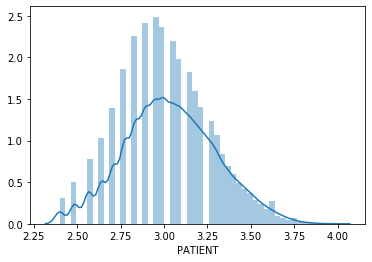

In [57]:
sns.distplot(ddf_conditions.compute()['PATIENT'].value_counts().map(lambda x: np.log(10+x)))

In [58]:
covid_patients_id = ddf_conditions[ddf_conditions.CODE == 840539006].PATIENT.unique()

In [60]:
covid_patients_id.compute()

0        afa2680f-7f73-46d9-b0cd-2cf3db49724b
1        26e5d262-6cdc-4274-a5cd-d7fd439e35f9
2        90031c21-e8a4-416e-b60b-23e871ee62dc
3        0ac2e031-ab88-41f9-ac5d-d7d588952222
4        45138fb4-dc79-4aec-ba78-7a012d3edca7
                         ...                 
73692    43d96255-e3ab-43af-97e6-494681105115
73693    12f7b700-0f7a-4e09-8adf-7d7f9c0c2fb0
73694    8722685f-ce37-4520-ab95-22b6929526c2
73695    62e3e406-8375-4cf5-aae7-0d489e40e73c
73696    18b4b304-dddd-41e8-a13d-08a3285552be
Name: PATIENT, Length: 73697, dtype: object

In [62]:
negative_patients_id = ddf_observations[(ddf_observations.CODE == '94531-1') &
                                    (ddf_observations.VALUE == 'Not detected (qualifier value)')].PATIENT

In [63]:
negative_patients_id.compute()

0        30fb496e-b8d3-4d36-8e50-86acb3d1a223
1        26e5d262-6cdc-4274-a5cd-d7fd439e35f9
2        90031c21-e8a4-416e-b60b-23e871ee62dc
3        0e07d4b4-8c0a-4cd0-a439-8f3b96ab884d
4        ef272f3c-6cbd-401c-97b5-db5de666b6e5
                         ...                 
16782    17264ca9-b271-47dd-9cf4-d83256c9da35
16783    aa84be11-2336-4752-bd43-2858715eef4c
16784    184d0311-e033-4c97-8d66-3809ca91be94
16785    acff780f-ccd1-4cef-ba8f-40eb70972098
16786    497bf8a5-2c19-4149-9a2e-f256c8165a7a
Name: PATIENT, Length: 16787, dtype: object

# Untested patient count ?

In [71]:
1 - (75417) / 117959

0.3606507345772684

In [68]:
ddf_observations[(ddf_observations.CODE == '94531-1')].PATIENT.unique().compute()

0        30fb496e-b8d3-4d36-8e50-86acb3d1a223
1        afa2680f-7f73-46d9-b0cd-2cf3db49724b
2        26e5d262-6cdc-4274-a5cd-d7fd439e35f9
3        90031c21-e8a4-416e-b60b-23e871ee62dc
4        0ac2e031-ab88-41f9-ac5d-d7d588952222
                         ...                 
75412    43d96255-e3ab-43af-97e6-494681105115
75413    12f7b700-0f7a-4e09-8adf-7d7f9c0c2fb0
75414    8722685f-ce37-4520-ab95-22b6929526c2
75415    62e3e406-8375-4cf5-aae7-0d489e40e73c
75416    18b4b304-dddd-41e8-a13d-08a3285552be
Name: PATIENT, Length: 75417, dtype: object

In [70]:
ddf_observations[(ddf_observations.CODE == '94531-1')].PATIENT.value_counts().compute()

7fa48f6a-a4ff-4c5e-acc4-3375453145c9    3
28973246-4d94-45e3-9b31-00c1fdc60949    3
923df7c3-eaac-4e6c-8433-b984ca19bc79    3
ce3167ee-2951-4b13-a75f-7c2bbc556b31    3
28a0f311-a29e-4aaf-8042-c69ec89973f9    3
                                       ..
a1bcba06-616f-47e3-a867-6b45b45210df    1
a1bc87f7-0ed3-4231-bf54-1cde168e9fb0    1
a1bc039f-1bdf-4fd8-8146-443df0f2933a    1
a1bbf7aa-ee66-4ee4-bf72-c456dd6d6d52    1
0000641f-540d-408b-ad16-93c2de94f446    1
Name: PATIENT, Length: 75417, dtype: int64